In [1]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE
import AE_Stats
from load_data_fn import load_data,load_data_no_filter,prep_ttbar

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import importlib


In [18]:
import importlib
importlib.reload(AE_Stats)

<module 'AE_Stats' from '/uscms_data/d3/nswood/Notebooks/ECON_AE_Development/AE_Stats.py'>

In [2]:
n = 80

arr = torch.load('TTBAR/ttbar_1_greater_0_sim')
if n > 0:
    for i in range(n):
        arr = torch.vstack([arr,torch.load(f'TTBAR/ttbar_{int(n+2)}_greater_0_sim')])



In [3]:
print(f'There are {len(arr)} wafers with sim energy > 0 ')
print(f'mean calcq is: {torch.mean(arr[:,0:48])}')
print(f'max calcq is: {torch.max(arr[:,0:48])}')

There are 892079 wafers with sim energy > 0 
mean calcq is: 16.369503009262633
max calcq is: 10788.0


In [48]:
dt_1 = []
dt_2 = []
dt_3 = []

for a in arr:
    
    if a[-4].item() ==0.: 
        dt_1.append(a)
    elif a[-4].item() ==1.0: 
        dt_2.append(a)
    else:
        dt_3.append(a)
    
dt_1 = torch.vstack(dt_1).float()
dt_2 = torch.vstack(dt_2).float()   
dt_3 = torch.vstack(dt_3).float()   

In [49]:
print(f'{len(dt_1)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_1[:,0:48])}')
print(f'std calcq: {torch.std(dt_1[:,0:48])}')
mean_dt_1 = torch.mean(dt_1[:,0:48])
std_dt_1 = torch.std(dt_1[:,0:48])

432654 wafers of type 0
mean calcq: 27.600881576538086
std calcq: 51.770050048828125


In [50]:
print(f'{len(dt_2)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_2[:,0:48])}')
print(f'std calcq: {torch.std(dt_2[:,0:48])}')
mean_dt_2 = torch.mean(dt_2[:,0:48])
std_dt_2 = torch.std(dt_2[:,0:48])

325153 wafers of type 0
mean calcq: 6.9415388107299805
std calcq: 36.54729461669922


In [51]:
print(f'{len(dt_3)} wafers of type 0')
print(f'mean calcq: {torch.mean(dt_3[:,0:48])}')
print(f'std calcq: {torch.std(dt_3[:,0:48])}')
mean_dt_3 = torch.mean(dt_3[:,0:48])
std_dt_3 = torch.std(dt_3[:,0:48])

134272 wafers of type 0
mean calcq: 3.010667085647583
std calcq: 57.36779022216797


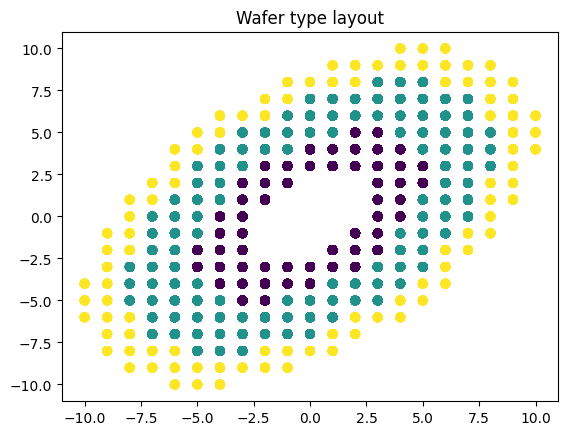

In [9]:
plt.title('Wafer type layout')
plt.scatter(arr[0:50000,-7],arr[0:50000,-6], c = arr[0:50000,-4])
plt.show() 

In [52]:
dt_1[:,0:48] = (dt_1[:,0:48] - torch.mean(dt_1[:,0:48]))/torch.std(dt_1[:,0:48])
dt_2[:,0:48] = (dt_2[:,0:48] - torch.mean(dt_2[:,0:48]))/torch.std(dt_2[:,0:48])
dt_3[:,0:48] = (dt_3[:,0:48] - torch.mean(dt_3[:,0:48]))/torch.std(dt_3[:,0:48])

In [68]:

size_train =30000
size_test = 3000
train_loc = dt_1[0:size_train]
test_loc = dt_1[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_1[0:size_train,0:48]
test = dt_1[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [35]:
size_train =200000
size_test = 20000
train_loc = dt_2[0:size_train]
test_loc = dt_2[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_2[0:size_train,0:48]
test = dt_2[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [36]:
size_train =100000
size_test = 10000
train_loc = dt_3[0:size_train]
test_loc = dt_3[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=50,
    shuffle=False
)

test_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=50,
    shuffle=False
)

train = dt_3[0:size_train,0:48]
test = dt_3[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=50,
    shuffle=False
)

test_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=50,
    shuffle=False
)

In [75]:
def AE_MSE(data,pred):
    return torch.mean(torch.sum((data-pred)**2,dim=1))

def AE_MAE(data,pred):
    return torch.mean(torch.sum(torch.abs(data-pred),dim=1))

def weighted_AE_MSE(data, pred):
    return torch.mean(torch.sum((data[:,0:48])**2,dim=1)*torch.sum((data-pred)**2,dim=1))

def dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def log_dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(torch.log((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def calcQ_Error(data,pred, mean,std):
    return torch.mean(torch.sum(torch.abs(pred-pred),dim=1))*std+mean
    
def new_loss(data,pred,epoch,cut = 5):
    #Reconstruction
    mse = AE_MSE(data,pred)
    if epoch < cut:
        return mse + std_error(data,pred) + torch.log(calcQ_Error(data,pred,dt_1_mean,dt_1_std))
    else:
        #Energy Conservation
        sum_dt, sum_pred = torch.sum(data, dim=1), torch.sum(pred,dim=1)
        sum_error = torch.sum(torch.norm(sum_dt-sum_pred))
        

        return  mse +std_error(data,pred)+ torch.log(calcQ_Error(data,pred,dt_1_mean,dt_1_std))+ sum_error*np.min([(epoch-cut)/cut,1])

In [80]:
num_epochs = 100
lr = 0.00045
loss =new_loss

In [ ]:
# fine-tune autoencoder
#batch 500

# model_1 = Naive_DAE([48,250,100,16])

optimizer = optim.Adam(model_1.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)
test = dt_1[-size_test:,0:48]

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d1_flat):
        model_1.train()
        data = data_list[0]
        v_pred = model_1(data)
        
        batch_loss = loss(data[:,0:48], v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = test
    model_1.eval()
    test_pred = model_1(data_test)
    batch_test = loss(data_test[:,0:48], test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_1.eval()
AE_Stats.gen_all_stats(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48],dt_1[-size_test:])


Epoch 0, lr 0.00045
Epoch 0: Train 32.13882093747457, Test 31.474388122558594
Epoch 1, lr 0.00045
Epoch 1: Train 31.343896001180013, Test 30.76331329345703
Epoch 2, lr 0.00045
Epoch 2: Train 30.71654943148295, Test 30.328964233398438
Epoch 3, lr 0.00045
Epoch 3: Train 30.462837047576905, Test 30.239974975585938
Epoch 4, lr 0.00045
Epoch 4: Train 30.217023776372272, Test 29.938430786132812
Epoch 5, lr 0.00045
Epoch 5: Train 30.050959955851237, Test 29.913455963134766
Epoch 6, lr 0.00045
Epoch 6: Train 32.83153226852417, Test 42.30522155761719
Epoch 7, lr 0.00045
Epoch 7: Train 33.74924746831258, Test 58.25164031982422
Epoch 8, lr 0.00045
Epoch 8: Train 34.85445604642232, Test 67.57332611083984
Epoch 9, lr 0.00045
Epoch 9: Train 35.43988927205404, Test 70.64457702636719
Epoch 10, lr 0.00045
Epoch 10: Train 35.80692449887594, Test 84.89535522460938
Epoch 11, lr 0.00045
Epoch 11: Train 34.98501447041829, Test 84.59044647216797
Epoch 12, lr 0.00045
Epoch 12: Train 34.286684923172, Test 78.0

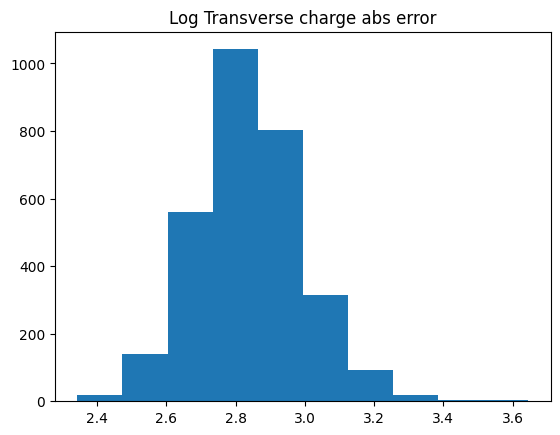

In [79]:
plt.title('Log Transverse charge abs error')
plt.hist(np.log10((torch.sum(torch.abs(model_1(dt_1[-size_test:,0:48])-dt_1[-size_test:,0:48]),dim=1)*std_dt_1+mean_dt_1).detach().numpy()))
plt.show()

In [41]:
def std_error(data,pred):
    return torch.mean(torch.sum(torch.abs(torch.subtract(data,pred)),dim=1))

std_error(model_1(test[-size_test:,0:48]),test[-size_test:,0:48])

tensor(11.7341, grad_fn=<MeanBackward0>)

Epoch 0, lr 0.0045
Epoch 0: Train 57.07724871683121, Test 50.90162658691406
Epoch 1, lr 0.0045
Epoch 1: Train 52.197769767522814, Test 43.494728088378906
Epoch 2, lr 0.0045
Epoch 2: Train 48.836338849544525, Test 44.579856872558594
Epoch 3, lr 0.0045
Epoch 3: Train 44.80565618729592, Test 44.05058670043945
Epoch 4, lr 0.0045
Epoch 4: Train 48.186207840442655, Test 41.69684600830078
Epoch 5, lr 0.0045
Epoch 5: Train 45.92182458186149, Test 37.21158218383789
Epoch 6, lr 0.0045
Epoch 6: Train 41.622736330032346, Test 42.30760192871094
Epoch 7, lr 0.0045
Epoch 7: Train 43.64981614613533, Test 35.1077995300293
Epoch 8, lr 0.0045
Epoch 8: Train 43.6169361140728, Test 33.43619918823242
Epoch 9, lr 0.0045
Epoch 9: Train 42.99343998718262, Test 30.902509689331055
Epoch 10, lr 0.0045
Epoch 10: Train 38.82743093180657, Test 35.41642379760742
Epoch 11, lr 0.0045
Epoch 11: Train 42.87113712739944, Test 37.24310302734375
Epoch 12, lr 0.0045
Epoch 12: Train 42.81273251581192, Test 40.60017776489258
E

Epoch 102, lr 0.000140625
Epoch 102: Train 9.589283814311027, Test 17.004993438720703
Epoch 103, lr 0.000140625
Epoch 103: Train 9.591580822348595, Test 19.401386260986328
Epoch 104, lr 0.000140625
Epoch 104: Train 9.573724368929863, Test 20.78196907043457
Epoch 105, lr 0.000140625
Epoch 105: Train 9.607128419518471, Test 17.94487762451172
Epoch 106, lr 0.000140625
Epoch 106: Train 9.580420495271683, Test 18.350080490112305
Epoch 107, lr 0.000140625
Epoch 107: Train 9.593306418418884, Test 18.368064880371094
Epoch 108, lr 0.000140625
Epoch 108: Train 9.606992804169655, Test 16.887042999267578
Epoch 109, lr 0.000140625
Epoch 109: Train 9.587163626909255, Test 19.51882553100586
Epoch 110, lr 0.000140625
Epoch 110: Train 9.572768320202828, Test 18.183860778808594
Epoch 111, lr 0.000140625
Epoch 111: Train 9.590801971435546, Test 19.08182144165039
Epoch 112, lr 0.000140625
Epoch 112: Train 9.58621860563755, Test 18.13144302368164
Epoch 113, lr 0.000140625
Epoch 113: Train 9.591400663852692

Epoch 197, lr 1.7578125e-05
Epoch 197: Train 8.834300358891488, Test 10.032848358154297
Epoch 198, lr 1.7578125e-05
Epoch 198: Train 8.834112524628638, Test 9.959922790527344
Epoch 199, lr 1.7578125e-05
Epoch 199: Train 8.838240886211395, Test 10.046688079833984
Epoch 200, lr 1.7578125e-05
Epoch 200: Train 8.834019000053406, Test 10.0728178024292
Epoch 201, lr 1.7578125e-05
Epoch 201: Train 8.834553268432618, Test 9.979222297668457
Epoch 202, lr 1.7578125e-05
Epoch 202: Train 8.83572201550007, Test 10.125594139099121
Epoch 203, lr 1.7578125e-05
Epoch 203: Train 8.831945136785507, Test 9.90444564819336
Epoch 204, lr 1.7578125e-05
Epoch 204: Train 8.832820609807968, Test 10.331238746643066
Epoch 205, lr 1.7578125e-05
Epoch 205: Train 8.83512955904007, Test 10.182472229003906
Epoch 206, lr 1.7578125e-05
Epoch 206: Train 8.834205630540847, Test 10.164300918579102
Epoch 207, lr 1.7578125e-05
Epoch 207: Train 8.83175218963623, Test 10.034700393676758
Epoch 208, lr 1.7578125e-05
Epoch 208: Tr

Epoch 291, lr 2.197265625e-06
Epoch 291: Train 8.735780187726021, Test 8.985817909240723
Epoch 292, lr 2.197265625e-06
Epoch 292: Train 8.73570880806446, Test 8.975656509399414
Epoch 293, lr 2.197265625e-06
Epoch 293: Train 8.735411291360855, Test 8.969486236572266
Epoch 294, lr 2.197265625e-06
Epoch 294: Train 8.735416572093964, Test 8.945555686950684
Epoch 295, lr 2.197265625e-06
Epoch 295: Train 8.735268774986267, Test 8.945119857788086
Epoch 296, lr 2.197265625e-06
Epoch 296: Train 8.735441524028777, Test 8.919524192810059
Epoch 297, lr 1.0986328125e-06
Epoch 297: Train 8.735446423053741, Test 8.924773216247559
Epoch 298, lr 1.0986328125e-06
Epoch 298: Train 8.729647227406502, Test 8.878876686096191
Epoch 299, lr 1.0986328125e-06
Epoch 299: Train 8.729650112390518, Test 8.884737968444824
Epoch 300, lr 1.0986328125e-06
Epoch 300: Train 8.729586380124092, Test 8.882572174072266
Epoch 301, lr 1.0986328125e-06
Epoch 301: Train 8.729613717675209, Test 8.8648681640625
Epoch 302, lr 1.098

Epoch 381, lr 1.71661376953125e-08
Epoch 381: Train 8.723784872174264, Test 8.818851470947266
Epoch 382, lr 1.71661376953125e-08
Epoch 382: Train 8.72377968454361, Test 8.818819999694824
Epoch 383, lr 1.71661376953125e-08
Epoch 383: Train 8.723774512648582, Test 8.818777084350586
Epoch 384, lr 1.71661376953125e-08
Epoch 384: Train 8.723768985748292, Test 8.818747520446777
Epoch 385, lr 1.71661376953125e-08
Epoch 385: Train 8.723763558864594, Test 8.818700790405273
Epoch 386, lr 1.71661376953125e-08
Epoch 386: Train 8.723758088946342, Test 8.818658828735352
Epoch 387, lr 1.71661376953125e-08
Epoch 387: Train 8.723752732157708, Test 8.818629264831543
Epoch 388, lr 1.71661376953125e-08
Epoch 388: Train 8.723747378826141, Test 8.818582534790039
Epoch 389, lr 1.71661376953125e-08
Epoch 389: Train 8.723741633057594, Test 8.818550109863281
Epoch 390, lr 1.71661376953125e-08
Epoch 390: Train 8.72373593366146, Test 8.818501472473145
Epoch 391, lr 1.71661376953125e-08
Epoch 391: Train 8.72373035

Epoch 469, lr 1.71661376953125e-08
Epoch 469: Train 8.723282967686654, Test 8.815459251403809
Epoch 470, lr 1.71661376953125e-08
Epoch 470: Train 8.723277175188064, Test 8.815424919128418
Epoch 471, lr 1.71661376953125e-08
Epoch 471: Train 8.723271540641784, Test 8.815386772155762
Epoch 472, lr 1.71661376953125e-08
Epoch 472: Train 8.723265556693077, Test 8.815352439880371
Epoch 473, lr 1.71661376953125e-08
Epoch 473: Train 8.723259826660156, Test 8.815312385559082
Epoch 474, lr 1.71661376953125e-08
Epoch 474: Train 8.723253677725792, Test 8.815268516540527
Epoch 475, lr 1.71661376953125e-08
Epoch 475: Train 8.72324779188633, Test 8.815227508544922
Epoch 476, lr 1.71661376953125e-08
Epoch 476: Train 8.723242069482803, Test 8.815192222595215
Epoch 477, lr 1.71661376953125e-08
Epoch 477: Train 8.723236209750176, Test 8.81515121459961
Epoch 478, lr 1.71661376953125e-08
Epoch 478: Train 8.723230491757393, Test 8.815108299255371
Epoch 479, lr 1.71661376953125e-08
Epoch 479: Train 8.72322491

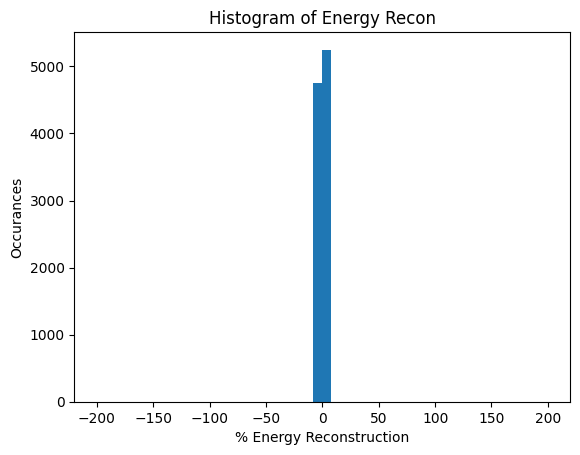

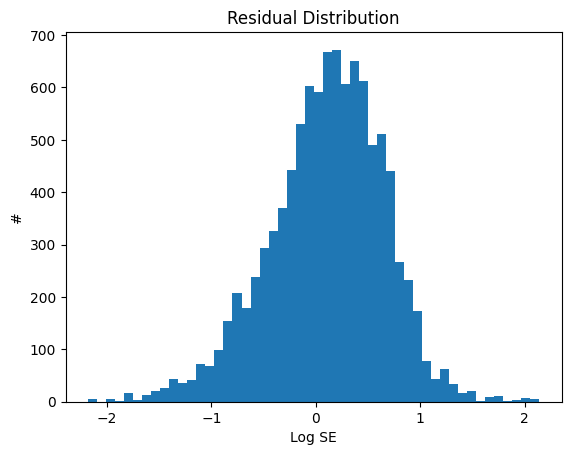

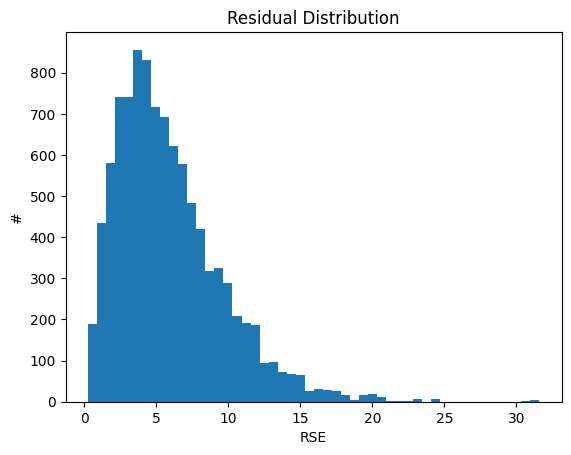

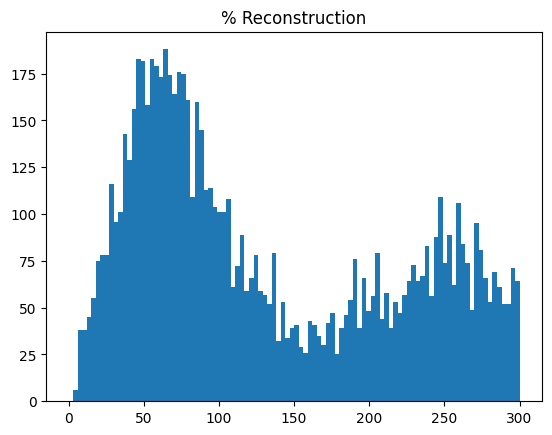

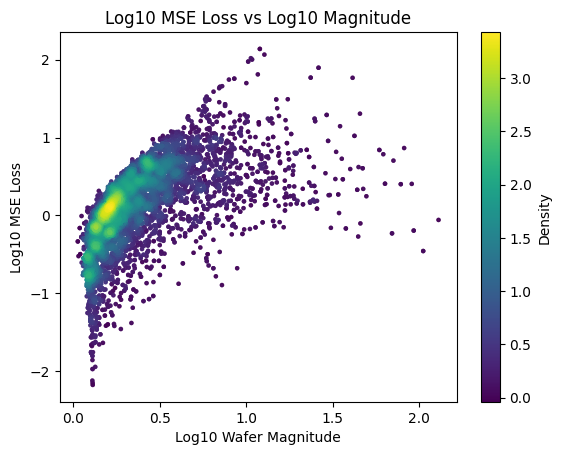

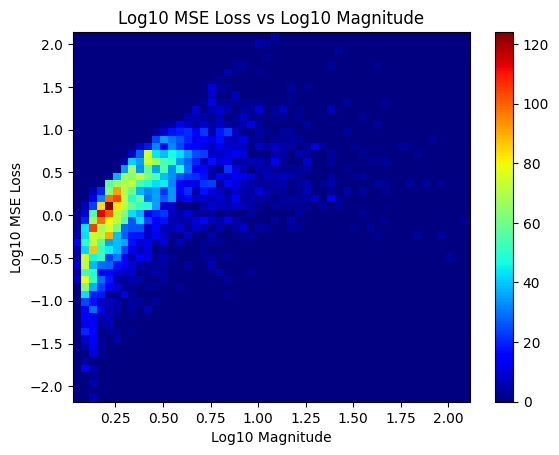

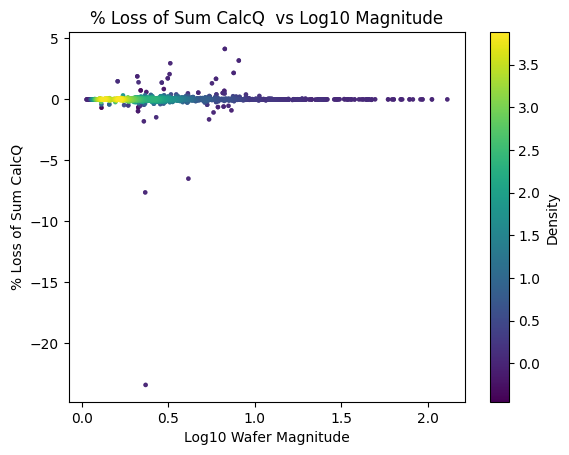

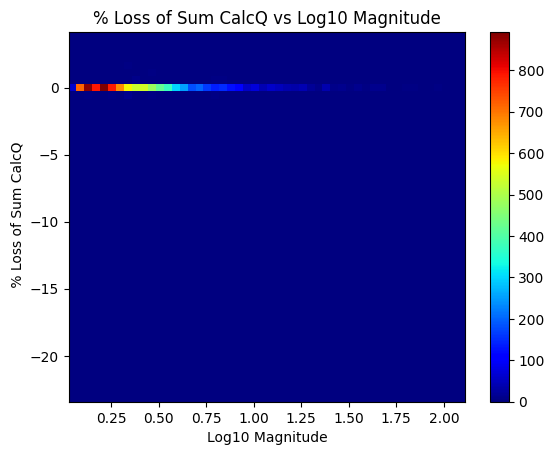

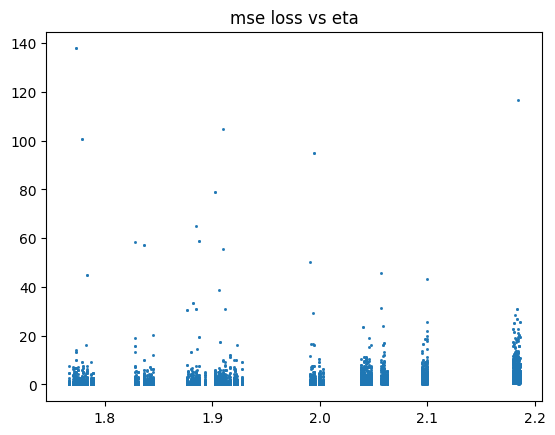

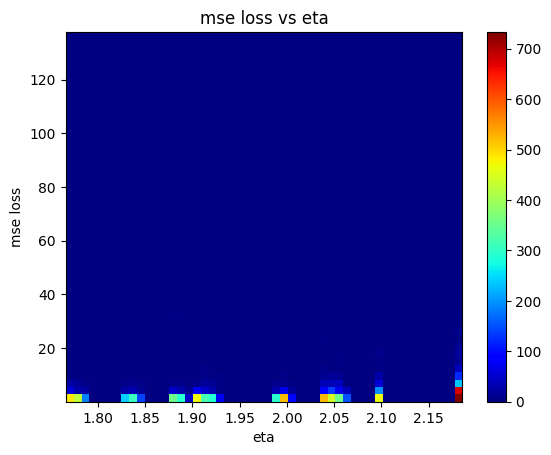

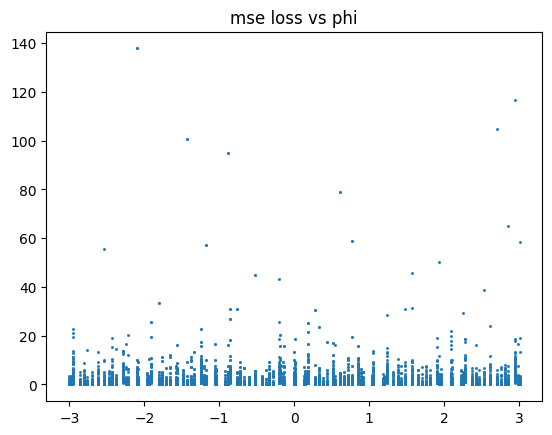

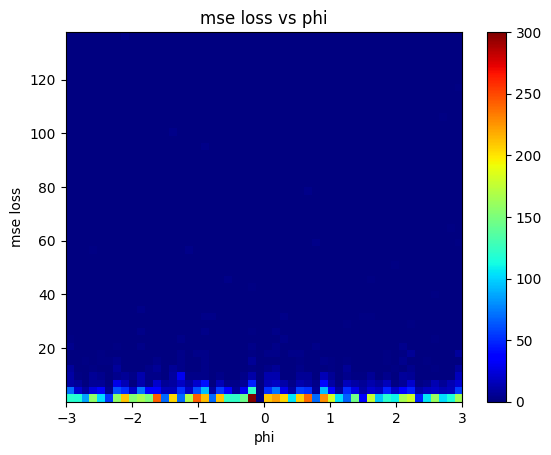

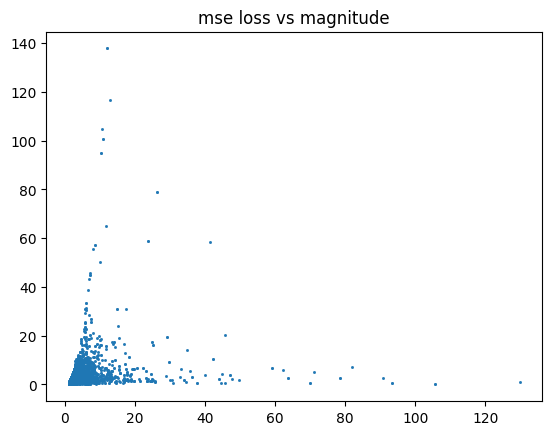

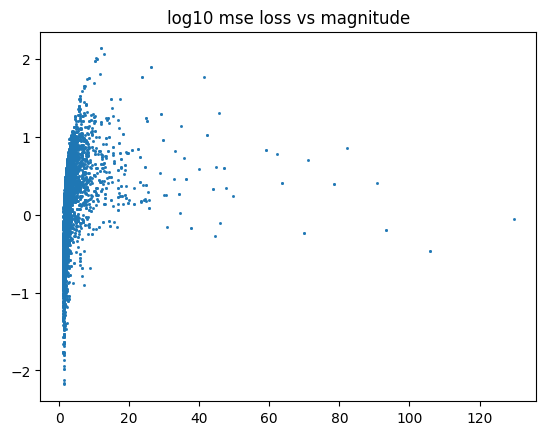

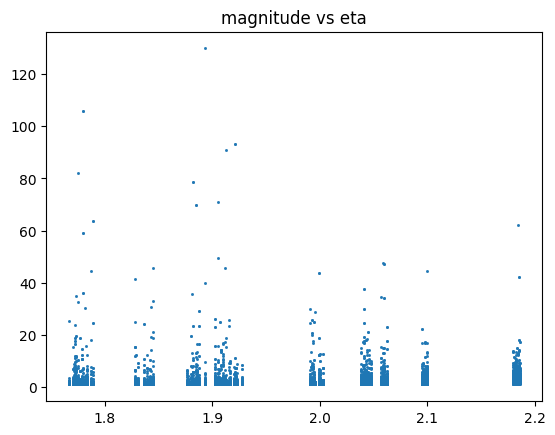

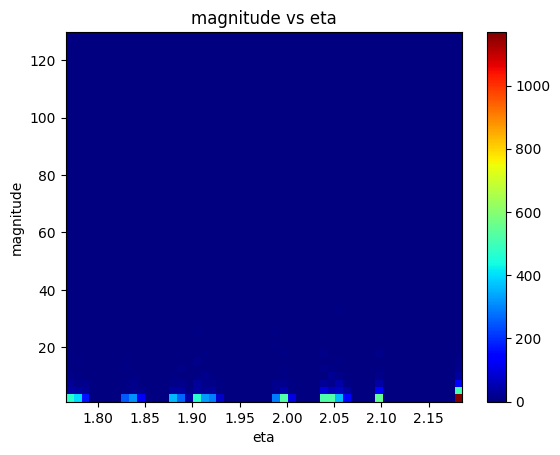

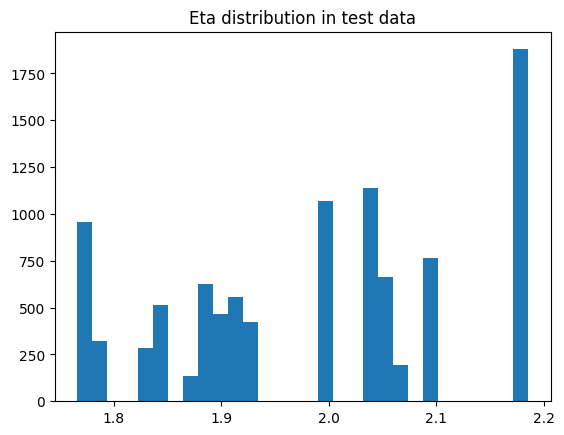

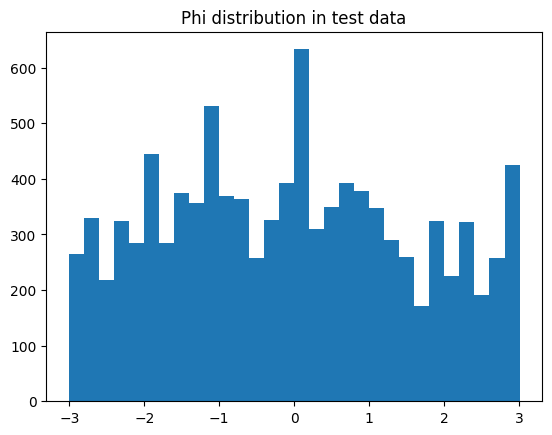

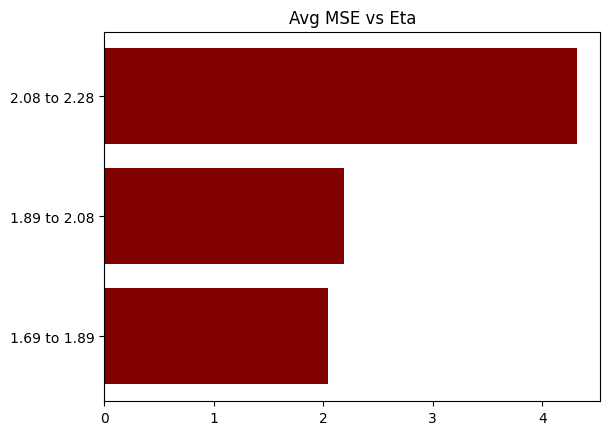

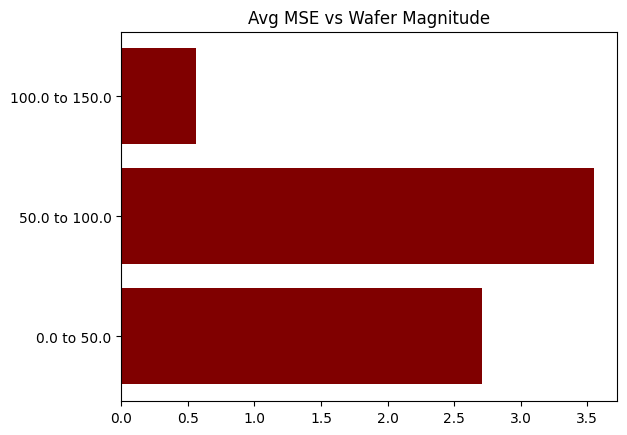

tensor([[ 2.0951,  1.0463,  5.0382,  1.4990,  6.0695],
        [ 2.0951,  1.0463,  3.7155,  6.9218, 11.0989],
        [ 2.0951,  1.0463,  2.2689,  2.5711,  8.5851],
        ...,
        [ 1.7728, -0.6662,  1.4019,  0.0848,  1.2569],
        [ 1.7728, -0.6662,  3.0569,  1.7276,  5.3370],
        [ 1.7728, -0.6662,  1.3821,  0.1870,  1.3944]], grad_fn=<CatBackward0>)

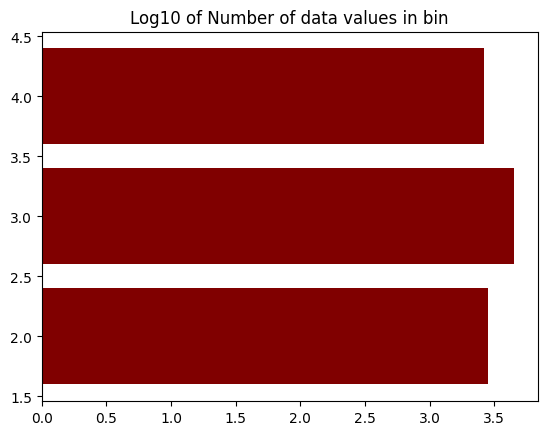

In [44]:
# fine-tune autoencoder
#batch 500


model_2 = Naive_DAE([48,250,100,16])
test = dt_2[-size_test:,0:48]

optimizer = optim.Adam(model_2.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d2_flat):
        model_2.train()
        data = data_list[0]
        v_pred = model_2(data)
        
        batch_loss = loss(data, v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_2[-size_test:,0:48]
    model_2.eval()
    test_pred = model_2(data_test)
    batch_test = loss(data_test, test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_2.eval()
AE_Stats.gen_all_stats(model_2(dt_2[-size_test:,0:48]),dt_2[-size_test:,0:48],dt_2[-size_test:])


In [60]:
torch.save(model_2,'dt_2_greater_0_250_100')

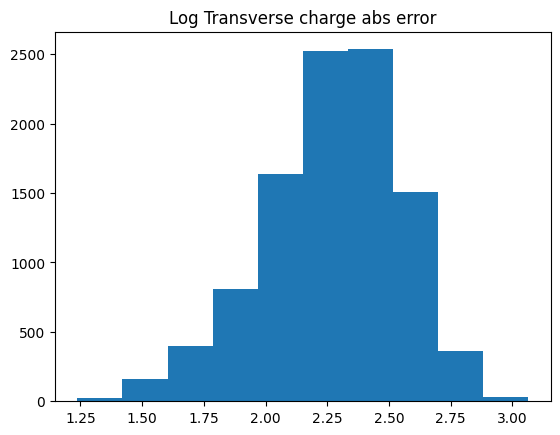

In [58]:
plt.title('Log Transverse charge abs error')
plt.hist(np.log10((torch.sum(torch.abs(model_2(dt_2[-size_test:,0:48])-dt_2[-size_test:,0:48]),dim=1)*std_dt_2+mean_dt_2).detach().numpy()))
plt.show()

Epoch 0, lr 0.0045
Epoch 0: Train 46.308715655744074, Test 43.608978271484375
Epoch 1, lr 0.0045
Epoch 1: Train 46.07224415773153, Test 35.668025970458984
Epoch 2, lr 0.0045
Epoch 2: Train 42.289210967719555, Test 36.08919906616211
Epoch 3, lr 0.0045
Epoch 3: Train 45.37550981909037, Test 32.507164001464844
Epoch 4, lr 0.0045
Epoch 4: Train 33.047345461905, Test 29.80935287475586
Epoch 5, lr 0.0045
Epoch 5: Train 33.76610023468733, Test 36.0334358215332
Epoch 6, lr 0.0045
Epoch 6: Train 50.079741046965125, Test 41.53316879272461
Epoch 7, lr 0.0045
Epoch 7: Train 48.04420415973663, Test 50.885520935058594
Epoch 8, lr 0.0045
Epoch 8: Train 55.34564294564724, Test 50.879150390625
Epoch 9, lr 0.0045
Epoch 9: Train 50.37050117748976, Test 50.87812423706055
Epoch 10, lr 0.0045
Epoch 10: Train 55.01412279075384, Test 35.449562072753906
Epoch 11, lr 0.0045
Epoch 11: Train 31.24346883815527, Test 31.505746841430664
Epoch 12, lr 0.0045
Epoch 12: Train 47.083996342480184, Test 51.01717758178711
E

Epoch 102, lr 0.000140625
Epoch 102: Train 7.663126419007778, Test 21.565187454223633
Epoch 103, lr 0.000140625
Epoch 103: Train 7.642266097664833, Test 24.691810607910156
Epoch 104, lr 7.03125e-05
Epoch 104: Train 7.653537964463234, Test 22.3056640625
Epoch 105, lr 7.03125e-05
Epoch 105: Train 7.36589004278183, Test 16.426115036010742
Epoch 106, lr 7.03125e-05
Epoch 106: Train 7.347809644579887, Test 13.8404541015625
Epoch 107, lr 7.03125e-05
Epoch 107: Train 7.3404575343132015, Test 16.381479263305664
Epoch 108, lr 7.03125e-05
Epoch 108: Train 7.343019609928131, Test 14.95309829711914
Epoch 109, lr 7.03125e-05
Epoch 109: Train 7.3355409045815465, Test 18.493762969970703
Epoch 110, lr 7.03125e-05
Epoch 110: Train 7.353052715957165, Test 16.016769409179688
Epoch 111, lr 7.03125e-05
Epoch 111: Train 7.348123021602631, Test 15.81161880493164
Epoch 112, lr 7.03125e-05
Epoch 112: Train 7.3467508661150935, Test 15.676916122436523
Epoch 113, lr 7.03125e-05
Epoch 113: Train 7.329690719008446,

Epoch 196, lr 2.74658203125e-07
Epoch 196: Train 7.035679018080234, Test 8.454130172729492
Epoch 197, lr 2.74658203125e-07
Epoch 197: Train 7.035580010473728, Test 8.453056335449219
Epoch 198, lr 2.74658203125e-07
Epoch 198: Train 7.035467798054218, Test 8.4517822265625
Epoch 199, lr 2.74658203125e-07
Epoch 199: Train 7.035361059427261, Test 8.450403213500977
Epoch 200, lr 2.74658203125e-07
Epoch 200: Train 7.035256075322628, Test 8.449418067932129
Epoch 201, lr 2.74658203125e-07
Epoch 201: Train 7.03514955163002, Test 8.448104858398438
Epoch 202, lr 2.74658203125e-07
Epoch 202: Train 7.035039947748184, Test 8.44683837890625
Epoch 203, lr 1.373291015625e-07
Epoch 203: Train 7.034935425341129, Test 8.445476531982422
Epoch 204, lr 1.373291015625e-07
Epoch 204: Train 7.034766378223896, Test 8.444077491760254
Epoch 205, lr 1.373291015625e-07
Epoch 205: Train 7.03470874273777, Test 8.443367958068848
Epoch 206, lr 1.373291015625e-07
Epoch 206: Train 7.0346485971212385, Test 8.442705154418945

Epoch 285, lr 1.71661376953125e-08
Epoch 285: Train 7.033137901186943, Test 8.42611312866211
Epoch 286, lr 1.71661376953125e-08
Epoch 286: Train 7.033129945099354, Test 8.426027297973633
Epoch 287, lr 1.71661376953125e-08
Epoch 287: Train 7.033122070074081, Test 8.425939559936523
Epoch 288, lr 1.71661376953125e-08
Epoch 288: Train 7.03311420160532, Test 8.425850868225098
Epoch 289, lr 1.71661376953125e-08
Epoch 289: Train 7.0331063787937165, Test 8.425762176513672
Epoch 290, lr 1.71661376953125e-08
Epoch 290: Train 7.033098506391048, Test 8.425671577453613
Epoch 291, lr 1.71661376953125e-08
Epoch 291: Train 7.03309073394537, Test 8.425588607788086
Epoch 292, lr 1.71661376953125e-08
Epoch 292: Train 7.033082850694656, Test 8.425500869750977
Epoch 293, lr 1.71661376953125e-08
Epoch 293: Train 7.033074996292591, Test 8.425411224365234
Epoch 294, lr 1.71661376953125e-08
Epoch 294: Train 7.033067141830921, Test 8.425322532653809
Epoch 295, lr 1.71661376953125e-08
Epoch 295: Train 7.03305928

Epoch 373, lr 1.71661376953125e-08
Epoch 373: Train 7.0324496533870695, Test 8.418431282043457
Epoch 374, lr 1.71661376953125e-08
Epoch 374: Train 7.032441800177097, Test 8.41833782196045
Epoch 375, lr 1.71661376953125e-08
Epoch 375: Train 7.03243392598629, Test 8.418251991271973
Epoch 376, lr 1.71661376953125e-08
Epoch 376: Train 7.032426178753376, Test 8.418168067932129
Epoch 377, lr 1.71661376953125e-08
Epoch 377: Train 7.032418292224407, Test 8.418078422546387
Epoch 378, lr 1.71661376953125e-08
Epoch 378: Train 7.032410423278809, Test 8.417988777160645
Epoch 379, lr 1.71661376953125e-08
Epoch 379: Train 7.032402579247951, Test 8.417901992797852
Epoch 380, lr 1.71661376953125e-08
Epoch 380: Train 7.03239480227232, Test 8.41781234741211
Epoch 381, lr 1.71661376953125e-08
Epoch 381: Train 7.032386991500855, Test 8.417732238769531
Epoch 382, lr 1.71661376953125e-08
Epoch 382: Train 7.032379190981388, Test 8.417642593383789
Epoch 383, lr 1.71661376953125e-08
Epoch 383: Train 7.032371417

Epoch 461, lr 1.71661376953125e-08
Epoch 461: Train 7.031761853694916, Test 8.410778999328613
Epoch 462, lr 1.71661376953125e-08
Epoch 462: Train 7.031753929197788, Test 8.410693168640137
Epoch 463, lr 1.71661376953125e-08
Epoch 463: Train 7.031746046423912, Test 8.410601615905762
Epoch 464, lr 1.71661376953125e-08
Epoch 464: Train 7.031738216996193, Test 8.410516738891602
Epoch 465, lr 1.71661376953125e-08
Epoch 465: Train 7.031730327129364, Test 8.41042709350586
Epoch 466, lr 1.71661376953125e-08
Epoch 466: Train 7.0317225363254545, Test 8.41033935546875
Epoch 467, lr 1.71661376953125e-08
Epoch 467: Train 7.031714760780335, Test 8.410253524780273
Epoch 468, lr 1.71661376953125e-08
Epoch 468: Train 7.03170685428381, Test 8.410168647766113
Epoch 469, lr 1.71661376953125e-08
Epoch 469: Train 7.031698955059052, Test 8.410079956054688
Epoch 470, lr 1.71661376953125e-08
Epoch 470: Train 7.03169111174345, Test 8.40999698638916
Epoch 471, lr 1.71661376953125e-08
Epoch 471: Train 7.0316833125

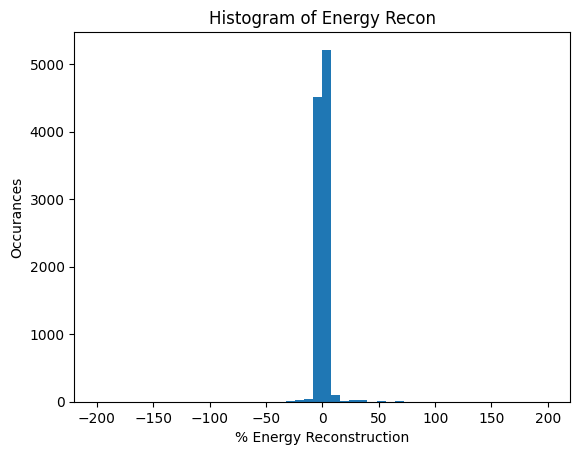

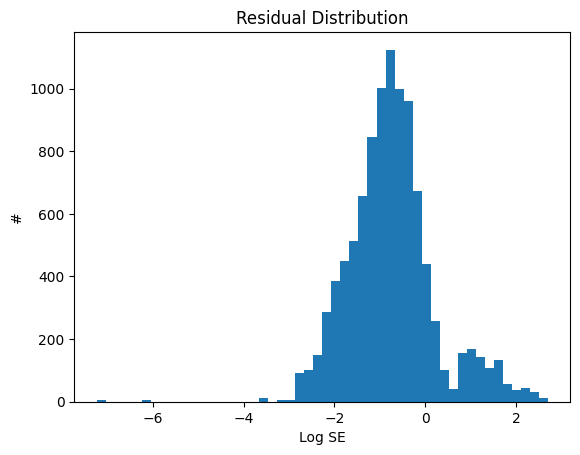

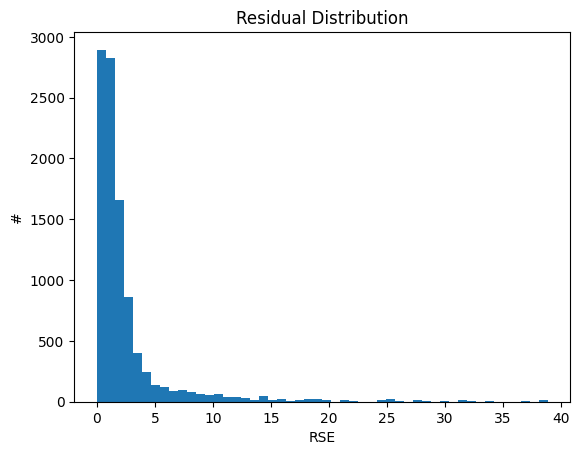

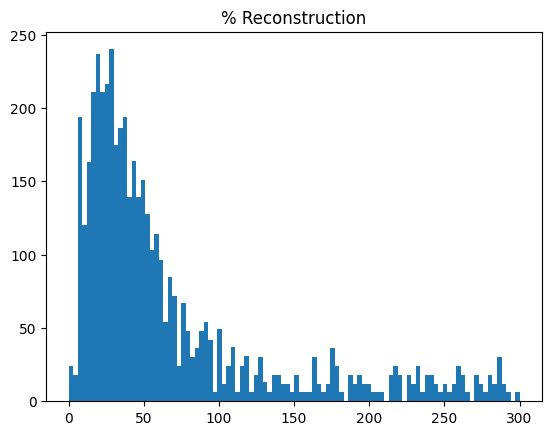

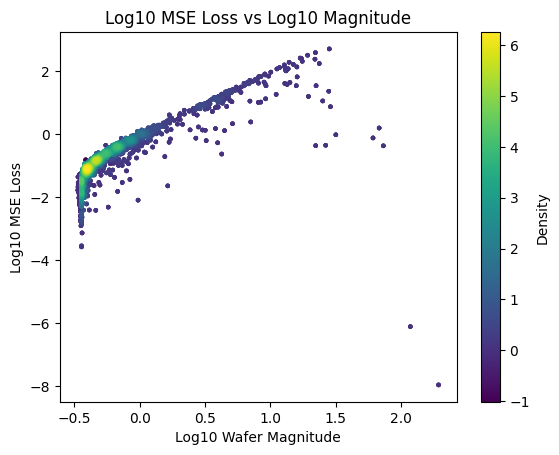

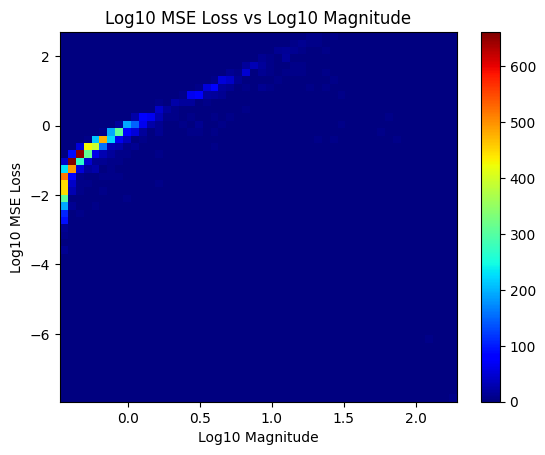

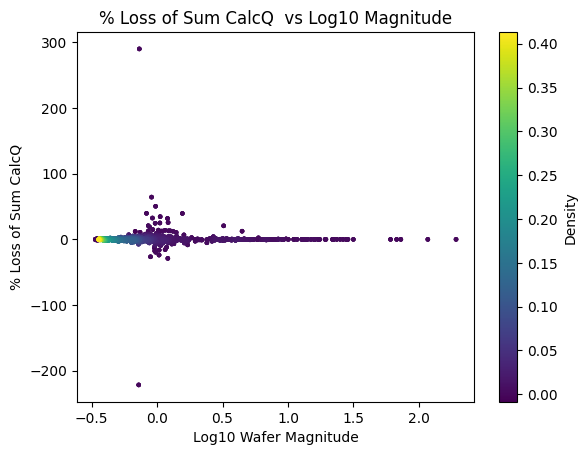

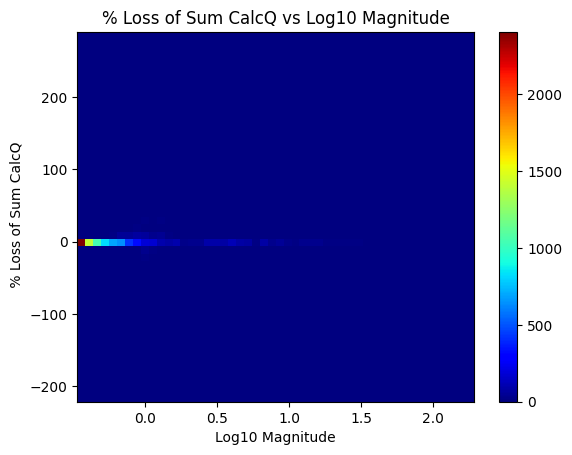

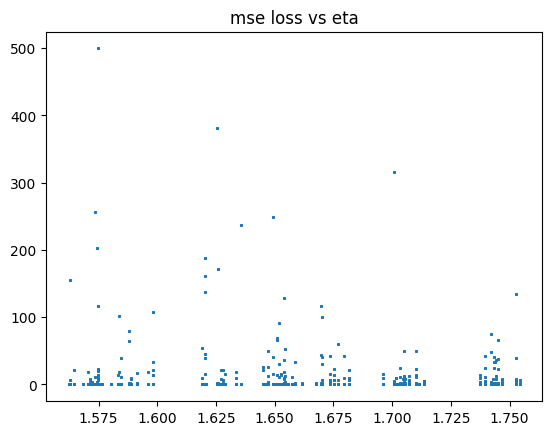

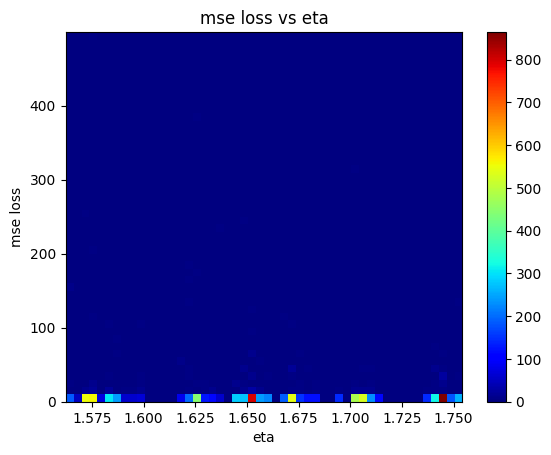

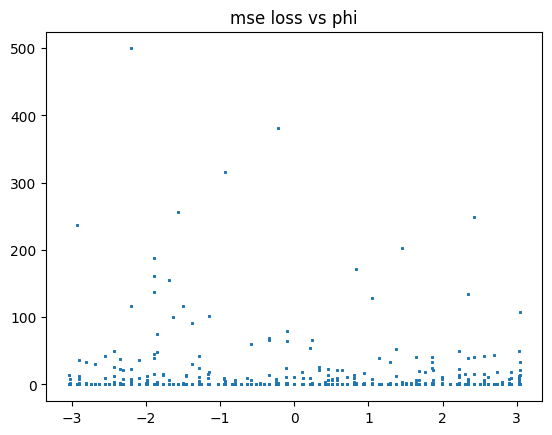

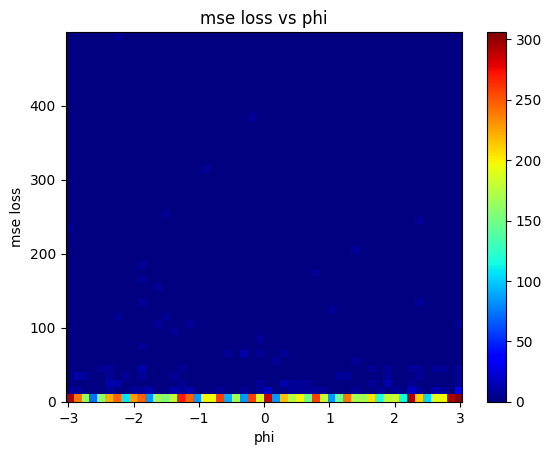

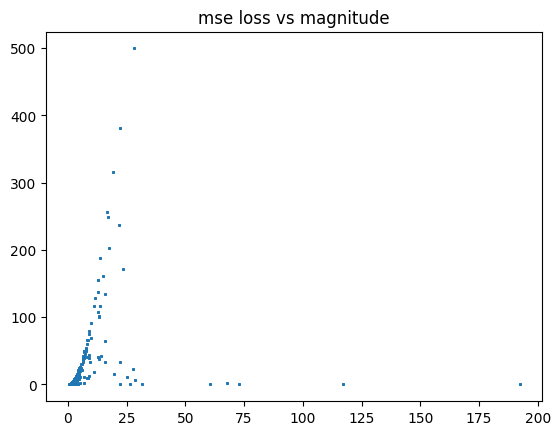

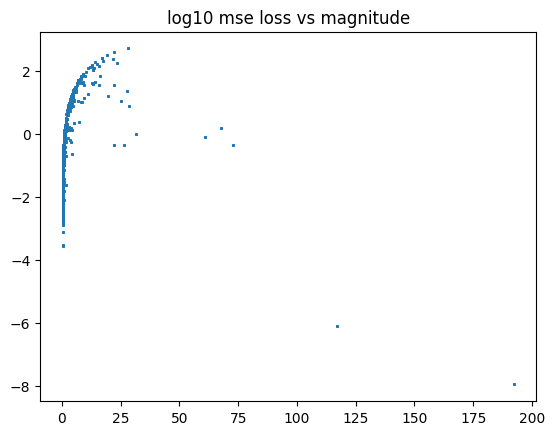

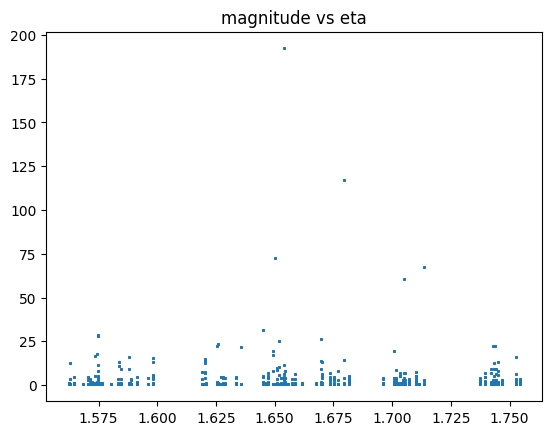

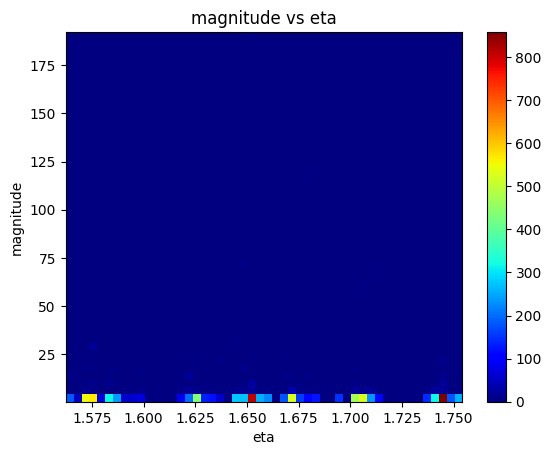

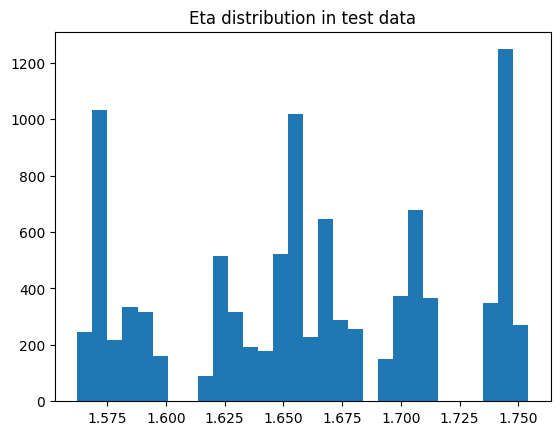

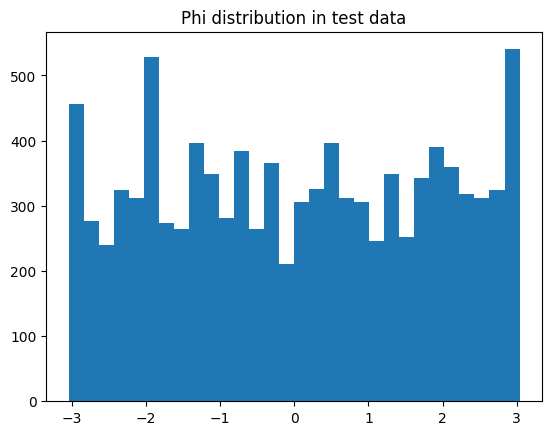

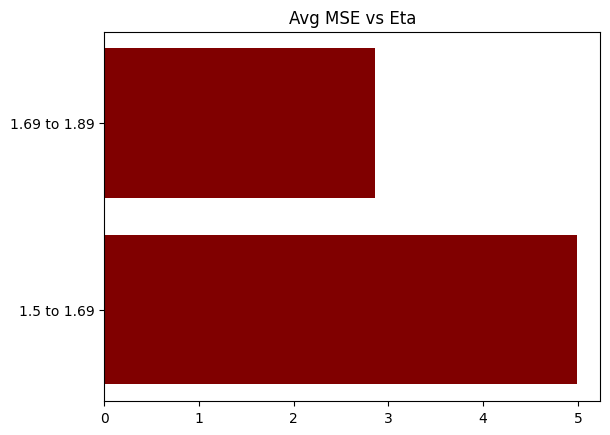

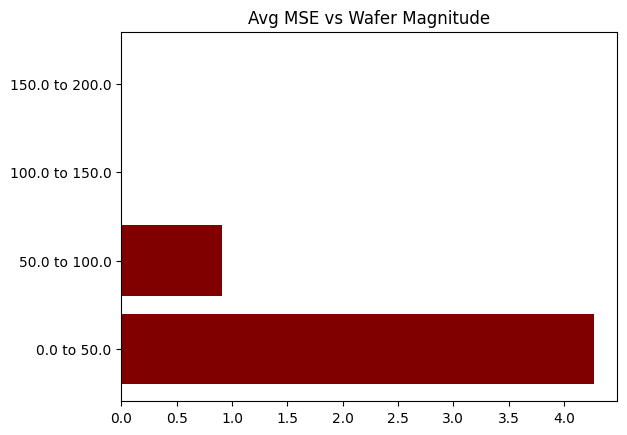

tensor([[ 1.5802, -2.6273,  0.3588,  0.0087,  0.2917],
        [ 1.5802, -2.6273,  0.3533,  0.0067,  0.2344],
        [ 1.5802, -2.6273,  0.8431,  0.3675,  1.6182],
        ...,
        [ 1.6256, -0.8328,  0.3762,  0.0318,  0.4517],
        [ 1.6256, -0.8328,  0.4796,  0.1238,  1.2188],
        [ 1.6256, -0.8328,  0.3576,  0.0077,  0.1743]], grad_fn=<CatBackward0>)

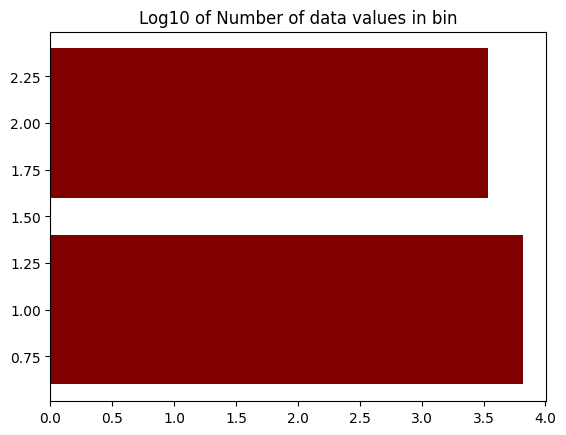

In [46]:
# fine-tune autoencoder
#batch 500


model_3 = Naive_DAE([48,250,100,16])
test = dt_3[-size_test:,0:48]
optimizer = optim.Adam(model_3.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d3_flat):
        model_3.train()
        data = data_list[0]
        v_pred = model_3(data)
        
        batch_loss = loss(data, v_pred,epoch) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_3[-size_test:,0:48]
    model_3.eval()
    test_pred = model_3(data_test)
    batch_test = loss(data_test, test_pred,epoch)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_3.eval()
AE_Stats.gen_all_stats(model_3(dt_3[-size_test:,0:48]),dt_3[-size_test:,0:48],dt_3[-size_test:])


In [61]:
torch.save(model_3,'dt_3_greater_0_250_100')

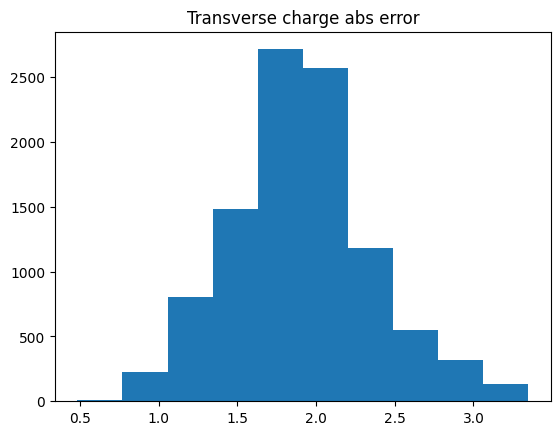

In [55]:
plt.title('Log Transverse charge abs error')
plt.hist(np.log10((torch.sum(torch.abs(model_3(dt_3[-size_test:,0:48])-dt_3[-size_test:,0:48]),dim=1)*std_dt_3+mean_dt_3).detach().numpy()))
plt.show()